In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select baseline features
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
y = df['Survived']

# Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))


C:\Users\Sarmita\AppData\Local\Temp\ipykernel_17212\2761820837.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
C:\Users\Sarmita\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:11:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Baseline Accuracy: 0.7039106145251397


In [2]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Get new feature names
poly_features = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

print(X_poly_df.head())


   Pclass   Age  SibSp  Parch     Fare  Pclass^2  Pclass Age  Pclass SibSp  \
0     3.0  22.0    1.0    0.0   7.2500       9.0        66.0           3.0   
1     1.0  38.0    1.0    0.0  71.2833       1.0        38.0           1.0   
2     3.0  26.0    0.0    0.0   7.9250       9.0        78.0           0.0   
3     1.0  35.0    1.0    0.0  53.1000       1.0        35.0           1.0   
4     3.0  35.0    0.0    0.0   8.0500       9.0       105.0           0.0   

   Pclass Parch  Pclass Fare   Age^2  Age SibSp  Age Parch   Age Fare  \
0           0.0      21.7500   484.0       22.0        0.0   159.5000   
1           0.0      71.2833  1444.0       38.0        0.0  2708.7654   
2           0.0      23.7750   676.0        0.0        0.0   206.0500   
3           0.0      53.1000  1225.0       35.0        0.0  1858.5000   
4           0.0      24.1500  1225.0        0.0        0.0   281.7500   

   SibSp^2  SibSp Parch  SibSp Fare  Parch^2  Parch Fare       Fare^2  
0      1.0          

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

model_poly = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)
print("Accuracy with Polynomial Features:", accuracy_score(y_test, y_pred_poly))


Accuracy with Polynomial Features: 0.7039106145251397


C:\Users\Sarmita\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


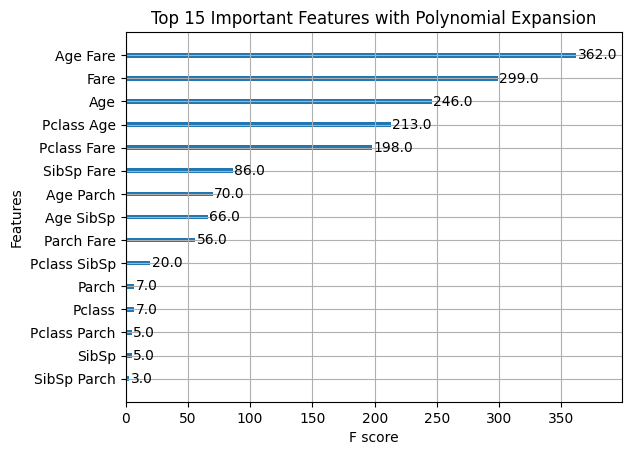

In [4]:
import matplotlib.pyplot as plt

xgb.plot_importance(model_poly, max_num_features=15)
plt.title("Top 15 Important Features with Polynomial Expansion")
plt.show()
